<a href="https://colab.research.google.com/github/rnrios/IntroML/blob/master/binary_classification/sales_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


data = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

In [ ]:
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
swap = {
    0: 1,
    1: 0
}

data['finished'] = data['unfinished'].map(swap)

In [ ]:
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


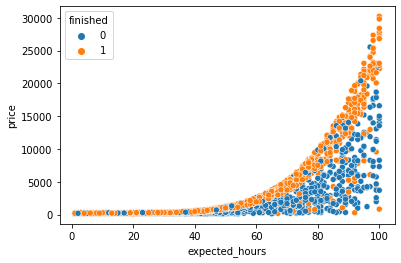

In [ ]:
import seaborn as sns


sns.scatterplot(x="expected_hours", y="price", data=data, hue="finished")

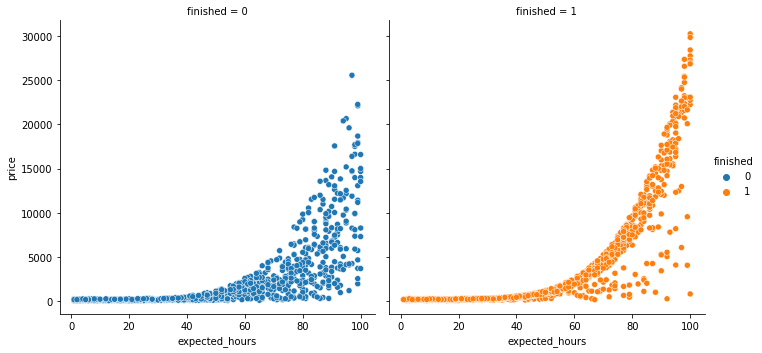

In [ ]:
sns.relplot(x="expected_hours", y="price", data=data, hue="finished", col="finished")

#LinearSVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X = data[['expected_hours', 'price']]
Y = data['finished']

SEED = 13
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=.25, 
                                                    random_state=SEED, 
                                                    stratify=Y)
model = LinearSVC(max_iter=1e6, random_state=SEED)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

acc = accuracy_score(Y_test, predictions)
print("Accuracy on test dataset: %.2f"% acc)

Accuracy on test dataset: 0.62


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
import numpy as np

baseline_predictions = np.ones(len(X_test))
acc = accuracy_score(Y_test, baseline_predictions)
print("Baseline accuracy on test dataset: %.2f"% acc)

Baseline accuracy on test dataset: 0.53


In [ ]:
x_min = X_test.expected_hours.min()
x_max = X_test.expected_hours.max()
y_min = X_test.price.min()
y_max = X_test.price.max()

In [ ]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max-x_min)/pixels)
y_axis = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [ ]:
xx, yy = np.meshgrid(x_axis, y_axis)
set_of_points = np.c_[xx.ravel(), yy.ravel()]
set_of_points

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.952281e+04],
       [9.802000e+01, 2.952281e+04],
       [9.901000e+01, 2.952281e+04]])

In [ ]:
Z = model.predict(set_of_points)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

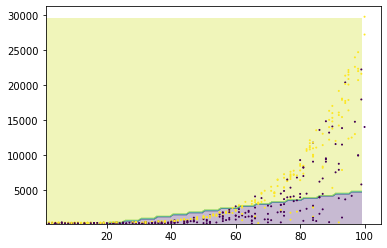

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test.expected_hours, X_test.price, c=Y_test, s=1)

#SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = data[['expected_hours', 'price']]
Y = data['finished']

SEED = 13
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=.25, 
                                                    random_state=SEED, 
                                                    stratify=Y)
model = SVC(gamma='auto', max_iter=1e6, random_state=SEED)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

acc = accuracy_score(Y_test, predictions)
print("Accuracy on test dataset: %.2f"% acc)  

Accuracy on test dataset: 0.63


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


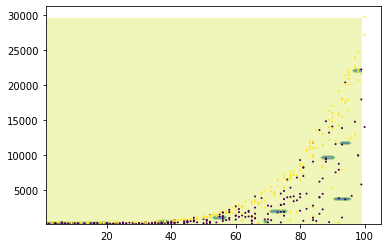

In [ ]:
import matplotlib.pyplot as plt


x_min = X_test.expected_hours.min()
x_max = X_test.expected_hours.max()
y_min = X_test.price.min()
y_max = X_test.price.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max-x_min)/pixels)
y_axis = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
set_of_points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(set_of_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test.expected_hours, X_test.price, c=Y_test, s=1)

#SVC normalizing input data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = data[['expected_hours', 'price']]
Y = data['finished']

SEED = 13
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=.25, 
                                                    random_state=SEED, 
                                                    stratify=Y)

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

model = SVC(gamma='auto', max_iter=1e6, random_state=SEED)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

acc = accuracy_score(Y_test, predictions)
print("Accuracy on test dataset: %.2f"% acc)  

Accuracy on test dataset: 0.66


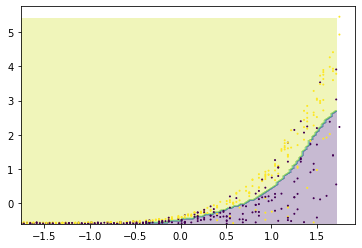

In [ ]:
import matplotlib.pyplot as plt


x_min = X_test[:,0].min()
x_max = X_test[:,0].max()
y_min = X_test[:,1].min()
y_max = X_test[:,1].max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max-x_min)/pixels)
y_axis = np.arange(y_min, y_max, (y_max-y_min)/pixels)

Z = model.predict(set_of_points)
Z = Z.reshape(xx.shape)

xx, yy = np.meshgrid(x_axis, y_axis)
set_of_points = np.c_[xx.ravel(), yy.ravel()]

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, s=1)